In [ ]:
#
# Projektarbete i Skriptprogrammering
# Esports Statistics from 1998-2024
#
# Grupp 30
# Andreas Lindström
# Johan Lidbäck
# 

# NOTE:
# I vår data så är Earnings samma som Prize Pool

# Importera moduler vi behöver
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
import matplotlib

In [222]:
# Läs in HistoricalEsportData.csv
data = pd.read_csv("HistoricalEsportData.csv")

# Konvertera vetenskaplig notation till decimal
pd.options.display.float_format = '{:,.0f}'.format

data["Earnings"] = data["Earnings"].astype(float)  # Konvertera Earnings kolumnen till float

# Gör om kolumnerna till numeriska värden
data["Earnings"] = pd.to_numeric(data["Earnings"], errors="coerce")
data["Players"] = pd.to_numeric(data["Players"], errors="coerce")
data["Tournaments"] = pd.to_numeric(data["Tournaments"], errors="coerce")

# Gör om till datetime
data["Date"] = pd.to_datetime(data["Date"], errors="coerce")

# Gör en ny kolumn där vi faktoriserar Game kolumnen för att inte ha string värden 
data["Game_numerical"] = pd.factorize(data["Game"])[0]

In [ ]:
# Läs in GeneralEsportData
ge_data = pd.read_csv("GeneralEsportData.csv")
# Faktorisera Genre från GeneralEsportData
ge_data["Genre_numerical"] = pd.factorize(ge_data["Genre"])[0]

In [ ]:
# Merge Genre into the Historical Data
data["Genre"] = data["Game"].map(ge_data.set_index("Game")["Genre"])
print(data)

            Date                                Game  Earnings  Players  \
0     1998-01-01        Command & Conquer: Red Alert    15,000        8   
1     1998-01-01                          QuakeWorld    15,000        8   
2     1998-05-01                            Quake II    15,000        4   
3     1998-05-01                  Total Annihilation    15,000        2   
4     1998-05-01                          QuakeWorld       300        3   
...          ...                                 ...       ...      ...   
10234 2024-10-01       Super Street Fighter II Turbo       340        3   
10235 2024-10-01               Skullgirls 2nd Encore       330        3   
10236 2024-10-01       StarCraft: Evo Complete (Mod)       308        4   
10237 2024-10-01            Melty Blood: Type Lumina       280        3   
10238 2024-10-01  Power Rangers: Battle for the Grid       200        3   

       Tournaments  Game_numerical                 Genre  
0                1               0      

In [ ]:
# Skriv ut count, mean, min, max, std och kvartiler
data.describe()

,Date,Earnings,Players,Tournaments,Game_numerical
count,10239,"10,239","10,239","10,239","10,239"
mean,2017-05-30 10:40:45.004395008,"186,278",62,7,230
min,1998-01-01 00:00:00,0,0,1,0
25%,2014-06-01 00:00:00,"1,207",6,1,113
50%,2018-10-01 00:00:00,"11,750",17,2,208
75%,2021-07-01 00:00:00,"77,569",53,6,337
max,2024-10-01 00:00:00,"40,140,651","2,134",172,620
std,NaN,"985,480",136,12,157


In [ ]:
# Gör om year till riktigt datetime
data["Year"] = pd.to_datetime(data["Date"]).dt.year.astype(int)
summ_tournament = data.groupby("Year")["Tournaments"].describe()
print(summ_tournament)

      count  mean  std  min  25%  50%  75%  max
Year                                           
1998     10     1    0    1    1    1    1    2
1999     10     2    1    1    1    1    2    4
2000     34     2    1    1    1    1    2    8
2001     38     2    1    1    1    1    2    5
2002     52     2    1    1    1    1    2    8
2003     83     2    2    1    1    2    3   12
2004     94     3    3    1    1    1    4   12
2005    132     3    3    1    1    2    3   11
2006    147     3    3    1    1    2    4   17
2007    184     3    4    1    1    1    3   23
2008    189     3    3    1    1    2    4   15
2009    177     4    4    1    1    2    6   16
2010    234     4    7    1    1    2    5   59
2011    265     6   14    1    1    3    5   80
2012    332     6   12    1    1    2    5   80
2013    357     7    9    1    1    4    7   60
2014    429     7   11    1    1    3    7   75
2015    546    10   16    1    1    3   10   94
2016    558     9   16    1    1    2   

In [ ]:
# Räkna ut totala summan som ett spel haft i priser
summ_money = data.groupby("Game")[["Earnings"]].sum().reset_index()
print(summ_money)

                         Game  Earnings
0                        ARMS    22,760
1    Acceleration of SUGURI 2       410
2                     After-H    83,863
3              Age of Empires   736,285
4           Age of Empires II 3,899,609
..                        ...       ...
616                 eFootball   492,000
617               iRacing.com 3,757,336
618                      osu!   279,093
619                   rFactor    15,084
620                 rFactor 2 2,218,753

[621 rows x 2 columns]


In [ ]:
# Kontrollera om det finns null-värden
null_values = data.isnull().sum()

null_values

Date              0
Game              0
Earnings          0
Players           0
Tournaments       0
Game_numerical    0
Genre             0
Year              0
dtype: int64

In [ ]:
# Spara den mergade datan till new_data.csv
data.to_csv("new_data.csv", index = False)

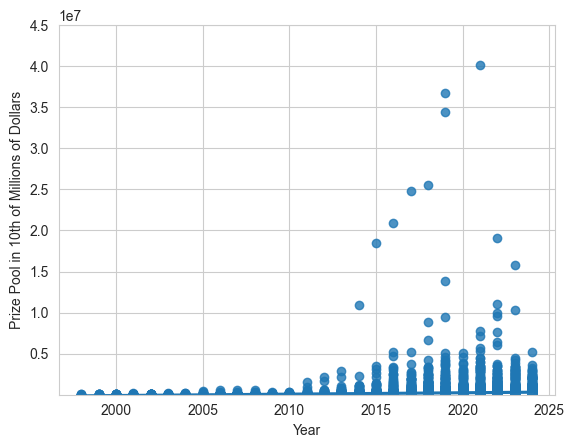

In [247]:
# Skapa en regressionsplot över Year och Earnings
sns.set_style("whitegrid")
axes = sns.regplot(x=data.Year, y=data.Earnings)
axes.set_ylim(10, 45000000)
plt.ylabel("Prize Pool in 10th of Millions of Dollars");


The regplot above tells us the prize pool in 10th of millions of dollars over the years from 1998 to 2024.

The highest prize pool is approximately 40million dollars

The regressionline is barely visible at the bottom

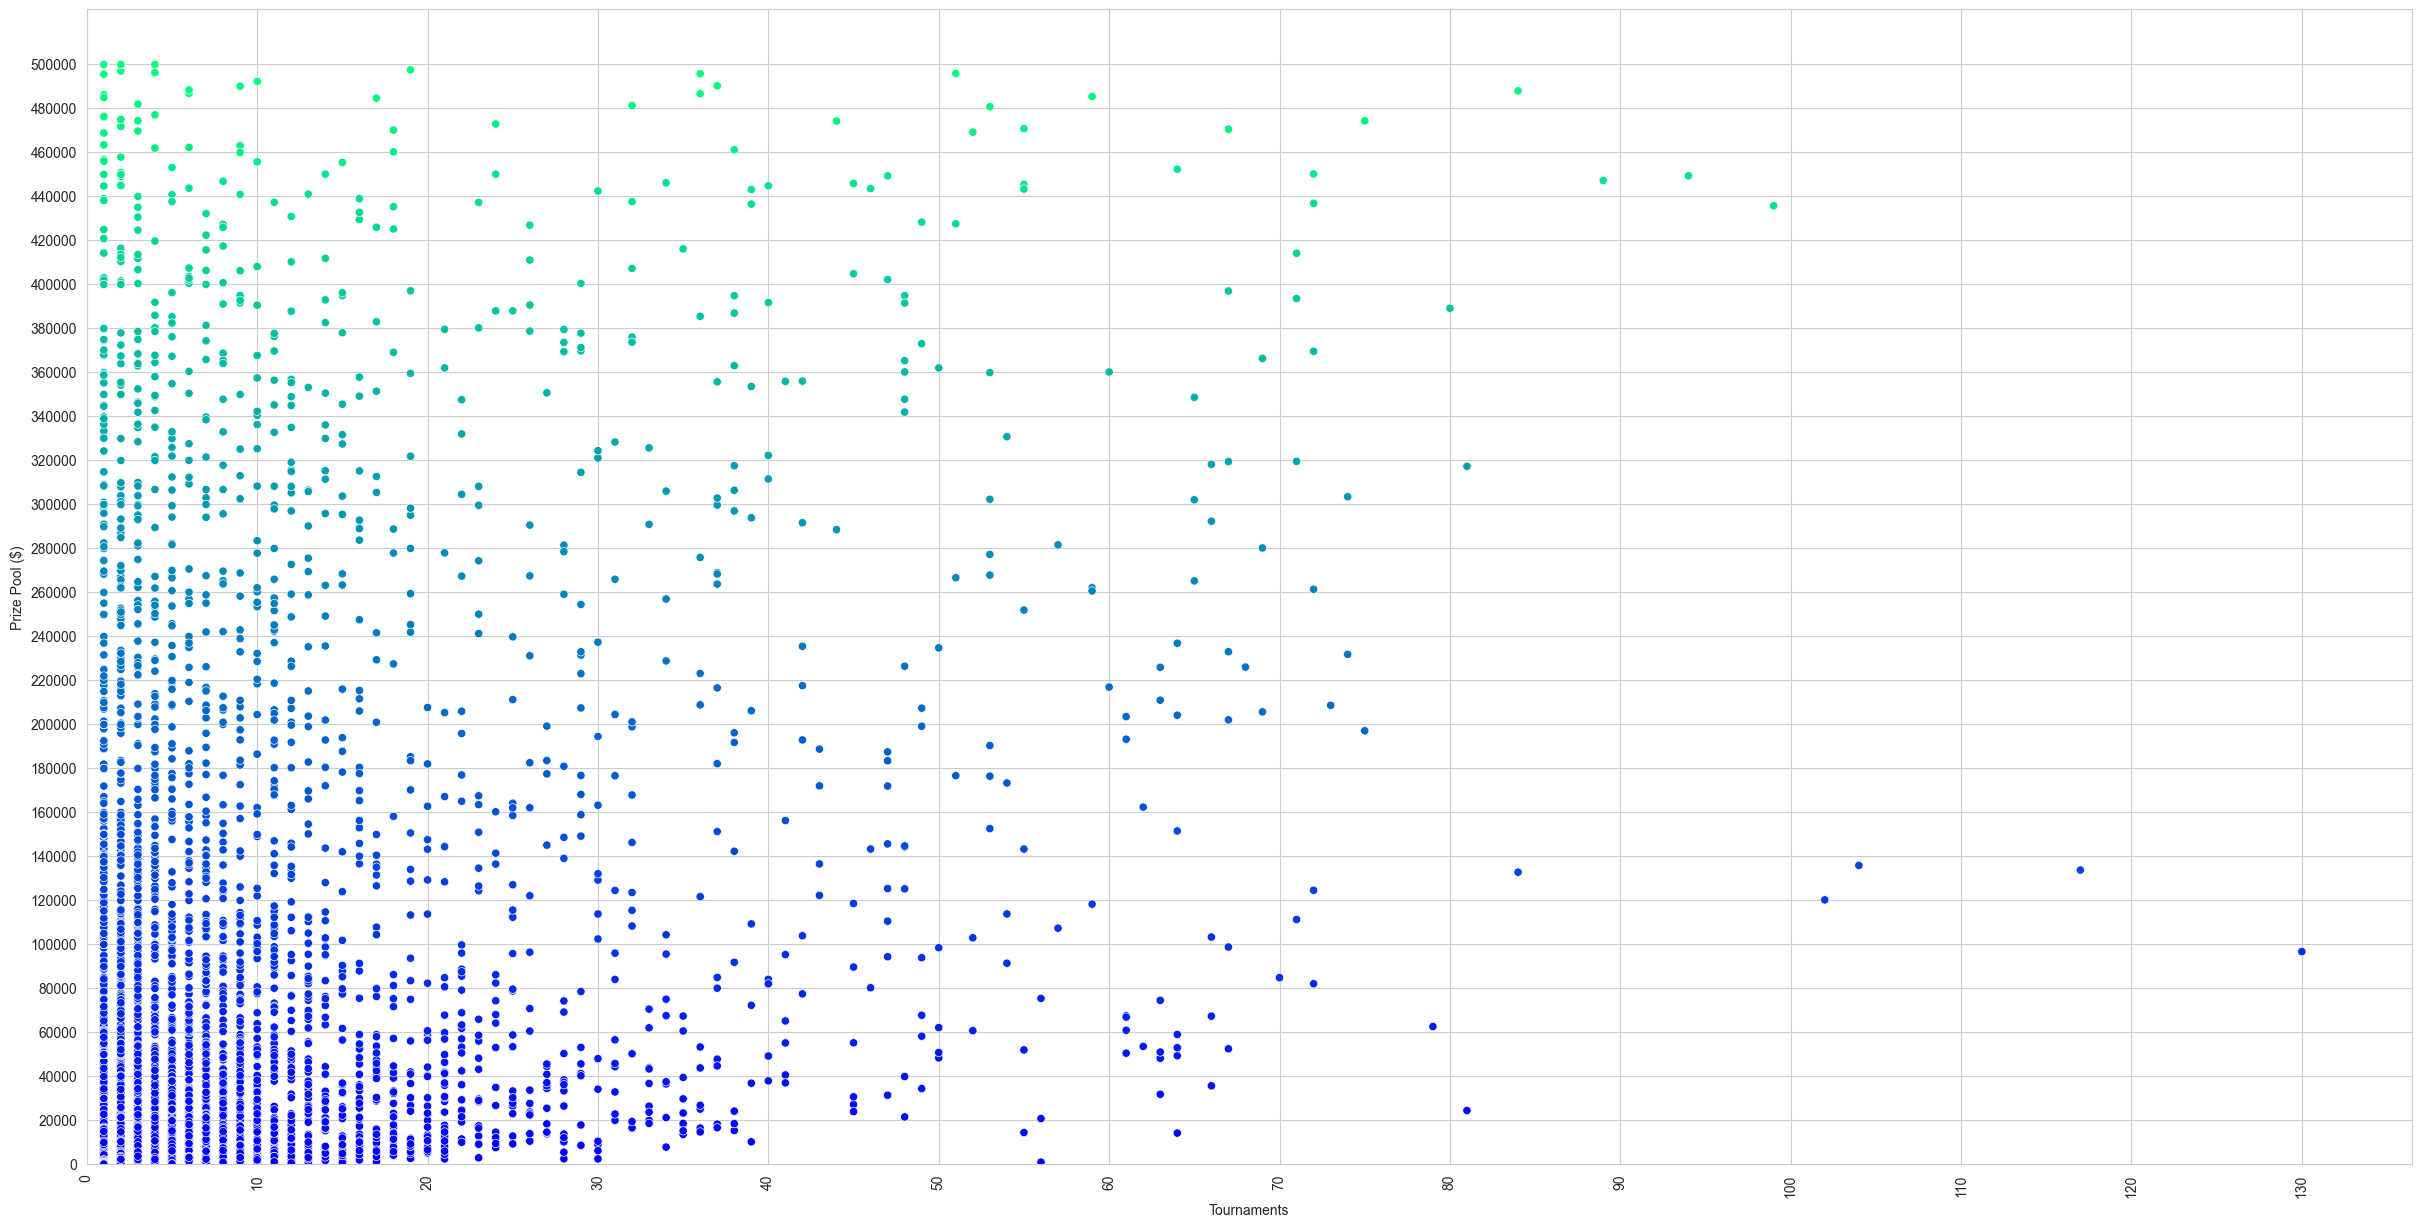

In [243]:
# Skapa en scatterplot över Tournaments och Year
data["YearMonth"] = data["Date"].dt.strftime("%Y/%m")
plt.figure(figsize=(30, 15))
filter_data = data[(data["Earnings"] > 0) & (data["Earnings"] <= 500000)] # Filtrera bort värden som är noll eller över 500k, då dom är outliers
axes = sns.scatterplot(data=filter_data, x="Tournaments", y="Earnings", hue="Earnings", palette = "winter", legend = False)
plt.xticks(np.arange(0, 131, 10), rotation=90);
plt.yticks(np.arange(0, 520000, 20000))
plt.xlim(left=0)
plt.ylim(bottom=-5)
plt.ylabel("Prize Pool ($)");
plt.xlabel("Tournaments");

Above is a scatterplot which tells us the relationship between the number of tournaments and their prize pools in Dollars.

Every dot in the plot is a game.

The majority of tournaments have low prize pools and higher prize pools are less common.

X-axes --> More tournaments

Y-axes --> Higher amount of money in the prize pools

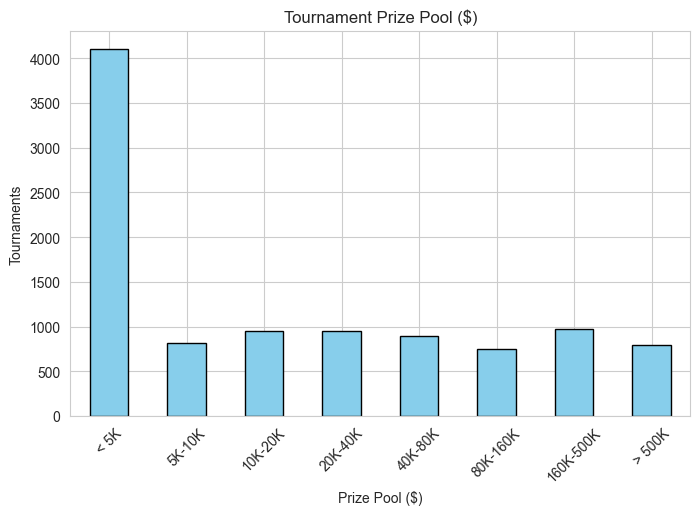

In [244]:
# Specificera bins och labels för Subplot
earnings_bins = [0, 5000, 10000, 20000, 40000, 80000, 160000, 500000, 50000000]
earnings_labels = ["< 5K", "5K-10K", "10K-20K", "20K-40K", "40K-80K", "80K-160K", "160K-500K", "> 500K"]

# Dela upp Earnings i bins
data["Earnings_Segment"] = pd.cut(data["Earnings"], bins=earnings_bins, labels=earnings_labels, include_lowest=True)

# Räkna ut antalet earnings_segment 
earnings_segment_counts = data["Earnings_Segment"].value_counts().sort_index()

# Plotta ut segmenten
fig, ax = plt.subplots(figsize=(8, 5))
earnings_segment_counts.plot(kind="bar", color="skyblue", edgecolor="black", ax=ax)
ax.set_title("Tournament Prize Pool ($)")
ax.set_xlabel("Prize Pool ($)")
ax.set_ylabel("Tournaments")
plt.xticks(rotation=45)
plt.show()

A bar plot that shows the number of tournaments based on their prize pool. As you can see, smaller prize pools are more common

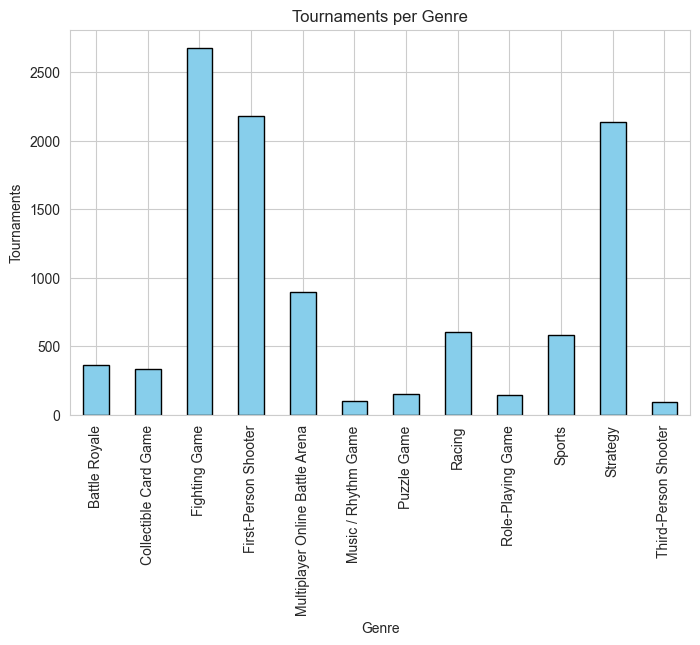

In [ ]:
# Räkna ut antalet Genres
genre_segment_counts = data["Genre"].value_counts().sort_index()

# Plotta ut segment
fig, ax = plt.subplots(figsize=(8, 5))
genre_segment_counts.plot(kind="bar", color="skyblue", edgecolor="black", ax=ax)
ax.set_title("Tournaments per Genre")
ax.set_xlabel("Genre")
ax.set_ylabel("Tournaments")
plt.xticks(rotation=90)
plt.show()

A bar plot that shows how many tournaments that have been played per Genre.

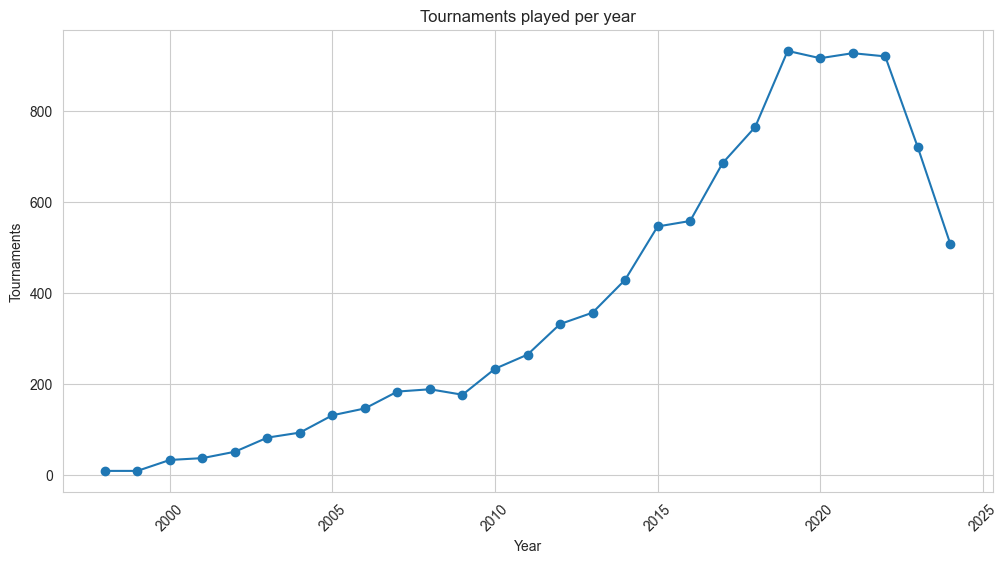

In [233]:
# Extrahera år
data["Year"] = pd.to_datetime(data["Date"]).dt.year

# Räkna antal turneringar per år
tournaments_per_year = data.groupby("Year").size()

# Plotta historiken
plt.figure(figsize=(12, 6))
plt.plot(tournaments_per_year.index, tournaments_per_year, marker="o", linestyle="-")
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Tournaments")
plt.title("Tournaments played per year")
plt.grid(True)
plt.show()

This is a Time series plot that shows number of tournaments played per year.
It peaks at approximately 930 tournaments between the years 2017 - 2019

In [ ]:
# Skapa ett pivot table och fyll i NaNs med 0 och runda av till två siffror
pivot = data.pivot_table(values="Earnings", index="Year", columns="Game", aggfunc="mean").fillna(0).round(2)
pivot

Game,ARMS,Acceleration of SUGURI 2,After-H,Age of Empires,Age of Empires II,Age of Empires III,Age of Empires IV,Age of Empires Online,Age of Mythology,Aim Gods,...,Zombieland VR: Headshot Fever,Zula,Zwift,chess24,chessarena.com,eFootball,iRacing.com,osu!,rFactor,rFactor 2
Year,,,,,,,,,,,,,,,,,,,,,
1998,0,0,0,"2,000",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000,0,0,0,"9,500","12,641",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2001,0,0,0,0,"20,068",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2002,0,0,0,100,"8,108",0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2003,0,0,0,625,"2,770",0,0,0,"14,882",0,...,0,0,0,0,0,0,0,0,0,0
2004,0,0,0,0,"5,696",0,0,0,"3,394",0,...,0,0,0,0,0,0,0,0,0,0
2005,0,0,0,0,"4,082",0,0,0,"2,250",0,...,0,0,0,0,0,0,0,0,0,0
2006,0,0,0,145,"6,333","1,125",0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


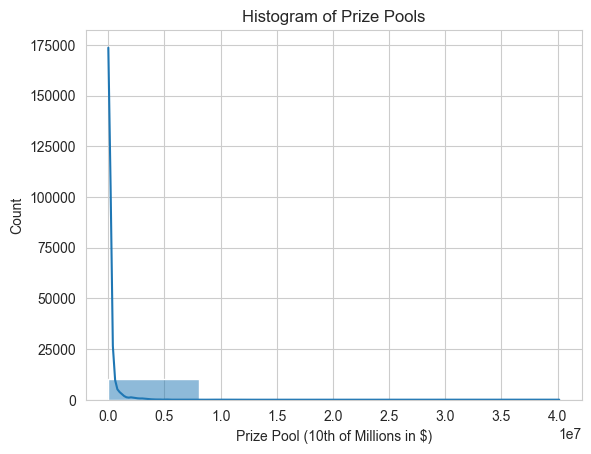

In [ ]:
# Histogram över Prize Pools
sns.histplot(data['Earnings'], bins=5, kde=True)
plt.title('Histogram of Prize Pools')
plt.xlabel("Prize Pool (10th of Millions in $)")
plt.show()

The histogram tells that the majority of tournaments have small prize pools.
Y-axe shows the count of many times the prize pool has appeared
X-axe shows the prize pool in 10th of million in dollars.

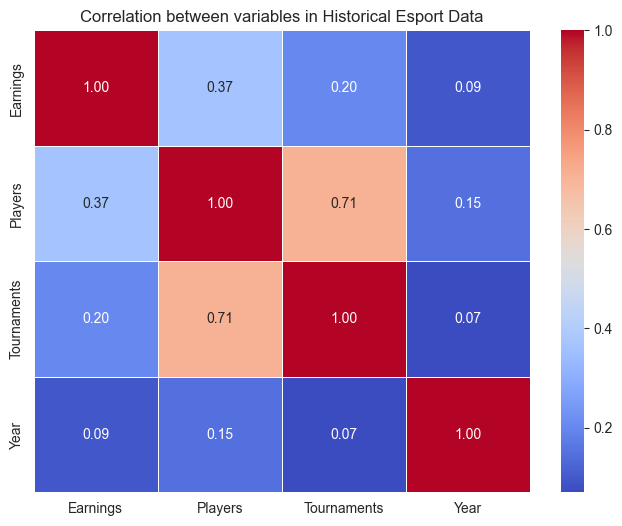

In [ ]:
# Ta bort kolumnen Game_numerical
fixed_data = data.drop(columns=["Game_numerical"], errors = "ignore")
# Beräkna korrelationen
fixed_corr = fixed_data.select_dtypes(include=["number"]).corr()

# Skapa en heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(fixed_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidth=0.5)
plt.title("Correlation between variables in Historical Esport Data")
plt.show()

This is a HeatMap of correlations which shows the relationship between the variables.
1.00 = perfect positive correlation
0.00 = no correlation between the variables
-1.00 = perfect negative correlation

Players & Tournaments --> high correlation: 0.71 --> More players often means more tournaments

Year & Earnings --> low correlation: 0,09 --> Which year it is doesn´t affect the earnings that much

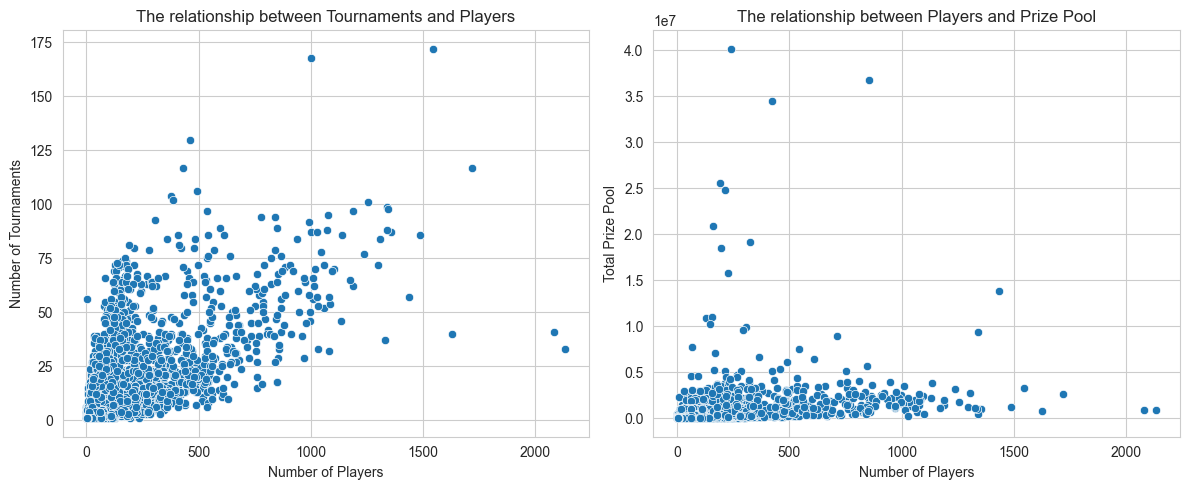

In [ ]:
# Skapar scatter-plots för att visa relationerna mellan variablerna
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter-plots mellan Players och Tournaments (hög korrelation)
sns.scatterplot(y=data["Tournaments"], x=data["Players"], ax=axes[0])
axes[0].set_title("The relationship between Tournaments and Players")
axes[0].set_ylabel("Number of Tournaments")
axes[0].set_xlabel("Number of Players")

# Scatter-plots mellan Earnings och Players (lägre korrelation)
sns.scatterplot(x=data["Players"], y=data["Earnings"], ax=axes[1])
axes[1].set_title("The relationship between Players and Prize Pool")
axes[1].set_ylabel("Total Prize Pool")
axes[1].set_xlabel("Number of Players")

plt.tight_layout()
plt.show()

The left graph shows the correlation between number of tournaments and number of players. High correlation

The more players a game has, the more tournaments are arranged. 

The right graph shows the correlation between the number of players and total earnings. weaker correlation

Popularity doesn´t always mean higher total earnings and some games have higher total earnings and fewer players. (maybe its because of sponsors)

In [ ]:
# Skapar en ny kolumn "Earnings per Tournament" där vi sparar summan av Earnings/Tournaments
data["Earnings per Tournament"] = data["Earnings"] / data["Tournaments"]

# Ersätt NaN eller oändliga värden (om det finns turneringar med 0 värde)
data["Earnings per Tournament"] = data["Earnings per Tournament"].replace([float("inf"), -float("inf")], 0).fillna(0)

print(data["Earnings per Tournament"].describe())

count      10,239
mean       43,060
std       199,796
min             0
25%           568
50%         3,730
75%        19,266
max     8,028,130
Name: Earnings per Tournament, dtype: float64


Our reviews of initial findings in our data:

We have gathered information on the prize money distributed in tournaments through the years 1998-2024 as well as the number of players per tournament.
This tells us more players in esport often means more tournaments arranged and the number of players doesn´t necesarry mean higher prize pools.


We have looked into the prize pools over the years of 1998-2024.
The Esport interest has been increasing a lot through the years. The prize pools were relatively low until the year 2010 and then increased significantly with a spike of 40,140,651 dollars.

We have a heatmap about our variables that tells us about correlations:
Tells us that number of players increases the number of tournaments (high correlation) and the variable year has very little influence on the other variables(low correlation)

The findings tells us Fighting, First person shooters and strategy game are the ones with the most tournaments while music and third-person shooters seems to be less popular with the lowest number of tournaments.

We found that esport has grown significantly over the years but had a downfall 2022-2023 which we believe could be a delayed effect of the pandemic. We also believe the curve will go back upp in the nearest future.


Below there will be answers to the following questions based on our data:

1. Which genre is the most popular?

2. Which year had the most tournaments?

3. Can we predict the number of tournaments played in the future?
 
4. Which genre has grown the fastest in arranged tournaments?

5. Can we predict which games in esport that will be the biggest in 5 years? 

Which genre is the most popular?

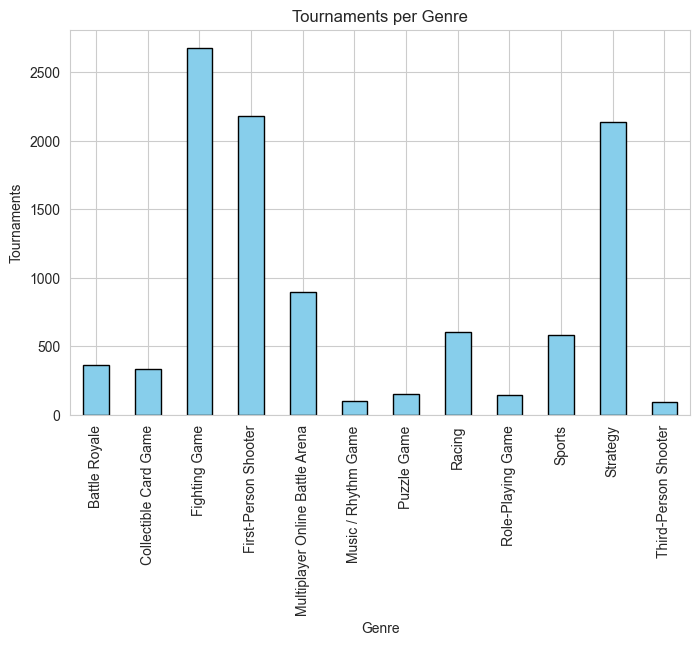

Most popular genres: Fighting games, First-Person shooters och strategy games

Which year had the most tournaments?

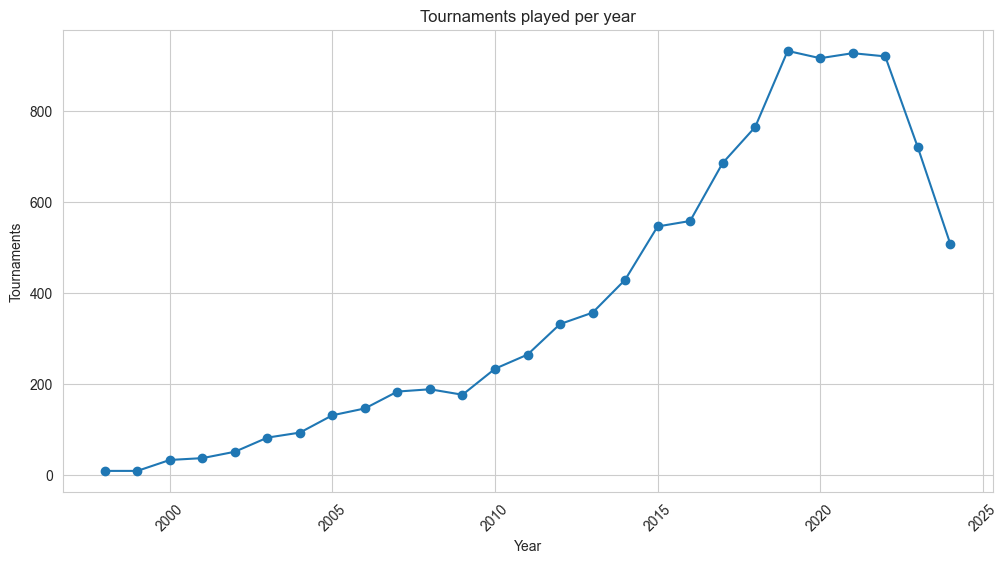

As you can se somewhere around year 2019 was the most tournaments played and after the year 2022 we can se a decrease which could have been a delayed consequence from the pandemic



Can we predict the number of tournaments played in the future?


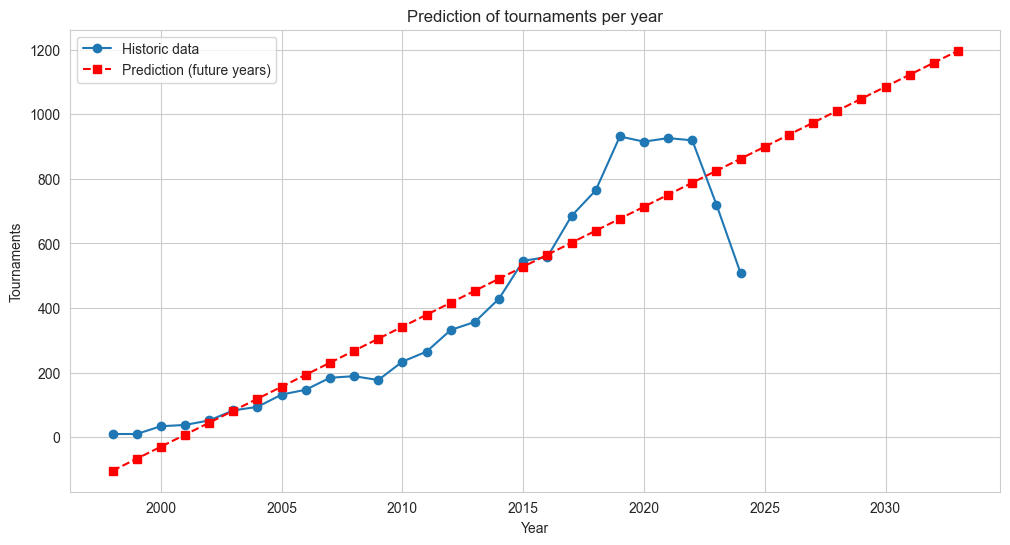

In [ ]:
# Förbered data för regression, hämtas från tournaments_per_year
x = tournaments_per_year.index.values.reshape(-1, 1)  # År som input
y = tournaments_per_year.values  # Antal turneringar som output

# Skapa och träna modellen
model = LinearRegression()
model.fit(x, y)

# Förutspå framtida år
future_years = np.arange(x.min(), x.max() + 10).reshape(-1, 1)  # Ställ in en prognos 10 år framåt
predictions = model.predict(future_years)  # Be modellen göra ett förutseende

# Plotta historik och prognos
plt.figure(figsize=(12, 6))
plt.plot(tournaments_per_year.index, tournaments_per_year, marker="o", linestyle="-", label="Historic data")
plt.plot(future_years, predictions, marker="s", linestyle="--", label="Prediction (future years)", color="red")
plt.xlabel("Year")
plt.ylabel("Tournaments")
plt.title("Prediction of tournaments per year")
plt.legend()
plt.grid(True)

Above, we have created a linearregressionanalyses that predicts the number of tournaments that will be arranged in the future.

The red line predicts 10 year in the future.

The blue line is the historic data.

Which genre has grown the fastest in arranged tournaments?

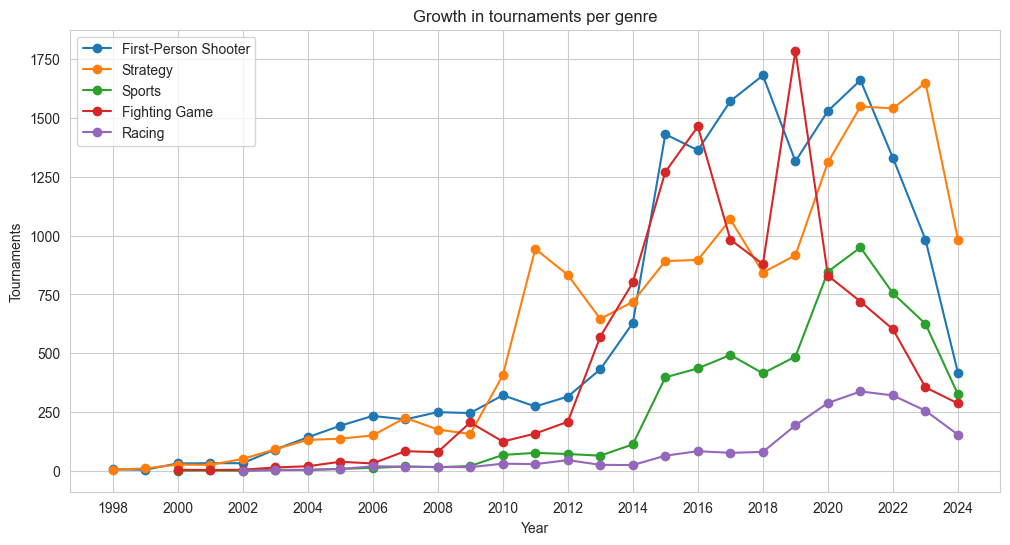

In [ ]:
# Gruppera efter genre och år, summera antalet turneringar
growth = data.groupby(["Genre", "Year"])["Tournaments"].sum().reset_index()

# Beräkna Genomsnittlig årlig tillväxt
pivot_growth = growth.pivot(index="Year", columns="Genre", values="Tournaments").fillna(0)

# Beräkning per genre
result = {}
years = pivot_growth.index

for genre in pivot_growth.columns:
    start_year = pivot_growth.loc[years.min(), genre]  # Hämta startvärde från minsta året i genre
    end_year = pivot_growth.loc[years.max(), genre]    # Hämta slutvärde från högsta året i genre 
    diff = years.max() - years.min()

    # CAGR = Compound Annual Growth Rate
    # https://en.wikipedia.org/wiki/Compound_annual_growth_rate
    if start_year > 0 and diff > 0:
        cagr = ((end_year / start_year) ** (1 / diff)) - 1  # CAGR Formula
        result[genre] = cagr    # Lägg till i dictionary

# Konvertera till en DataFrame för visning
cagr_dataframe = pd.DataFrame(result.items(), columns=["Genre", "CAGR"]).sort_values(by="CAGR", ascending=False)

# Filtrera ut genrer med tillräcklig data för att kunna göra en visualisering
top_five_genres = growth["Genre"].value_counts().index[:5]

# Filtrera datasetet för att inkludera dessa genrer
filtered_growth = growth[growth["Genre"].isin(top_five_genres)]

# Skapa ett linjediagram för att visa tillväxten av turneringar per genre över tid
plt.figure(figsize=(12, 6))

# Loopa igenom och plotta ut från ett subset
for genre in top_five_genres:
    subset = filtered_growth[filtered_growth["Genre"]==genre]
    plt.plot(subset["Year"], subset["Tournaments"], marker="o", label=genre)

# Anpassa x-axeln för att visa fler sektioner (varannat år)
plt.xticks(np.arange(growth["Year"].min(), growth["Year"].max() + 1, 2))

plt.xlabel("Year")
plt.ylabel("Tournaments")
plt.title("Growth in tournaments per genre")
plt.legend()
plt.grid(True)


Above, We answer the question: which genre has grown the fastest in arranged tournaments?
We can se that First-Person shooters have risen rapidly and the same thing goes for Fight games which also has its up and downs. An honourable mention is strategy games which has a more stable growth.


Can we predict which games in esport that will be the biggest in 5 years? 

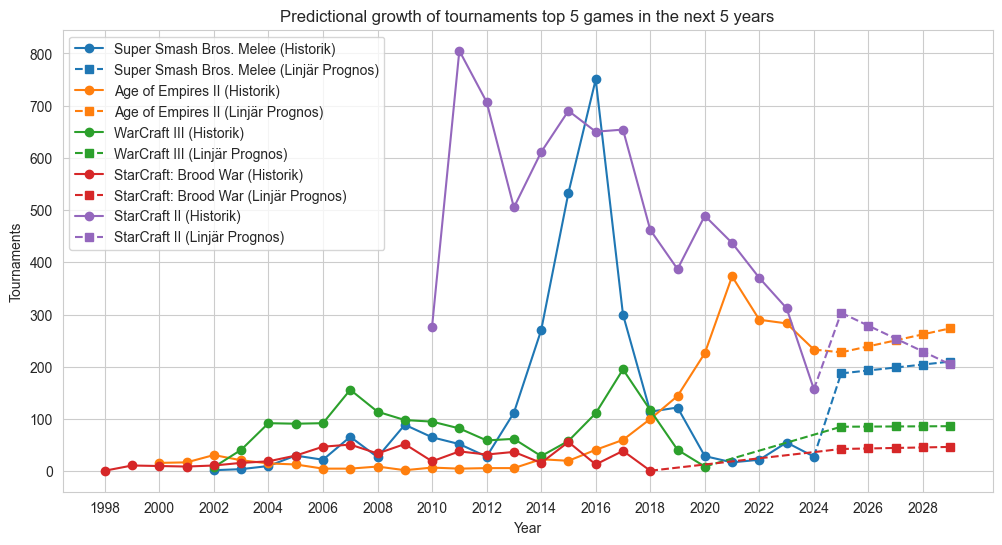

In [ ]:
# Skapa en figur för att visualisera de 5 största spelen med linjär regression
plt.figure(figsize=(12, 6))

# Skapa variablef för top 5 spel och dom kommande 5 åren
top_five_games = data["Game"].value_counts().index[:5]
upcoming_years = list(range(data["Year"].max() + 1, data["Year"].max() + 6))

# Skapa en predict_results dictionary
predict_results = {} 

# Definiera färger för varje spel, detta görs för att datan inte ska få annan färg vid visualisering
colors = matplotlib.colormaps.get_cmap("tab10")
color_map = {game: colors(i % 10) for i, game in enumerate(top_five_games)}

# Loopa igenom de 5 mest populära spelen
for game in top_five_games:
    # Skapa ett subset och gruppera det
    subset = data[data["Game"] == game].copy()
    subset["Year"] = pd.to_datetime(subset["Date"]).dt.year
    subset = subset.groupby("Year")["Tournaments"].sum().reset_index()

    # Om det finns för få datapunkter, hoppa över
    if len(subset) < 3:
        continue

    # Förbered data för linjär regression
    x = subset["Year"].values.reshape(-1, 1)
    y = subset["Tournaments"].values

    # Träna modellen
    model = LinearRegression()
    model.fit(x, y)

    # Gör en prognos för de kommande 5 åren
    x_prediction = np.array(upcoming_years).reshape(-1, 1)
    prediction = model.predict(x_prediction)

    # Spara prediction i predict_results
    predict_results[game] = prediction

    # Plotta historisk data
    plt.plot(subset["Year"], subset["Tournaments"], marker="o", linestyle="-", label=f"{game} (History)", color=color_map[game])

    # För att få en linje som går från sista datapunkten till första prediktiva punkt
    plt.plot([subset["Year"].iloc[-1], upcoming_years[0]], [subset["Tournaments"].iloc[-1], prediction[0]],
             linestyle="--", color=color_map[game])

    # Plotta prognosen med linjär regression
    plt.plot(upcoming_years, prediction, linestyle="--", marker="s", label=f"{game} (Linear Regression)", color=color_map[game])

    # Anpassa x-axeln för att inkludera framtida år
plt.xticks(np.arange(data["Year"].min(), max(upcoming_years) + 1, 2))


plt.xlabel("Year")
plt.ylabel("Tournaments")
plt.title("Predictional growth of tournaments top 5 games in the next 5 years")
plt.legend()
plt.grid(True)

Above shows the prediction of esports 5 biggest games in 5 years.
The graph says that Starcraft 2 has the most tournamnets and Age of Empires takes the lead in the year 2030